In [24]:
import itertools
from collections import defaultdict
import random
import numpy as np
from multiprocessing import Pool
from multiprocessing.pool import ThreadPool

import pickle
import multiprocessing
from pandarallel import pandarallel
import pandas as pd 
import pickle
from tqdm.notebook import tqdm
from flip_pancake import pancake_neighbours
import ast
from slide_tile import slide_neighbours
import matplotlib.pyplot as plt



/home/izmaylov/.conda/envs/tf_cpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/izmaylov/.conda/envs/tf_cpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/izmaylov/.conda/envs/tf_cpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

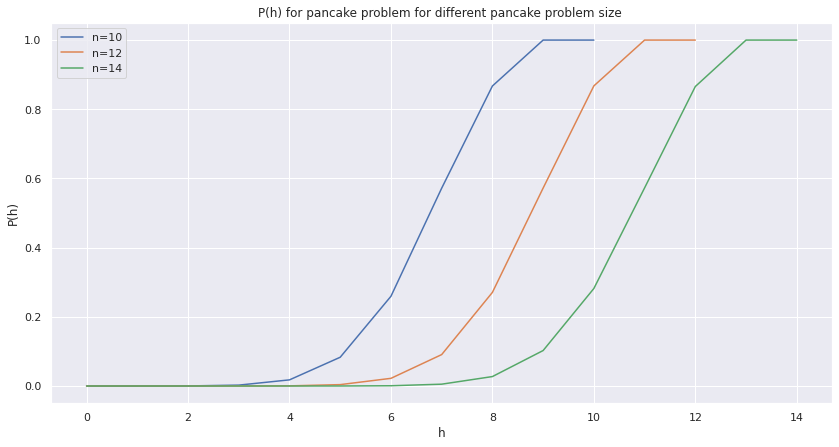

In [25]:
#read pickle file
for n in [10,12,14]:
    with open(f'all_dict_h_{n}.pickle', 'rb') as handle:
        all_dict_h = pickle.load(handle)
    all_dict_h=all_dict_h[n]#turn default dict to dict
    all_h_list=sorted(all_dict_h.items(), key=lambda x: x[0])
    #plot using seaborn
    sns.lineplot([x[0] for x in all_h_list],[x[1] for x in all_h_list],label=f"n={n}")
    # plt.plot([x[0] for x in all_h_list],[x[1] for x in all_h_list])
    #add legend
    # plt.legend([f"n={n}"])

    # add x,y label and title
plt.xlabel("h")
plt.ylabel("P(h)")
plt.title("P(h) for pancake problem for different pancake problem size " )


plt.show()

In [26]:
with open('all_dict_condisonal_h_12.pickle', 'rb') as handle:
    condi_h = pickle.load(handle)
condi_h=condi_h[12]

In [27]:
condi_h

{0: defaultdict(int, {}),
 1: defaultdict(int,
             {2: 0.8181818181818182,
              1: 0.15151515151515152,
              0: 0.030303030303030304}),
 2: defaultdict(int, {3: 0.7, 1: 0.045454545454545456, 2: 0.2545454545454545}),
 3: defaultdict(int,
             {4: 0.6128526645768025,
              3: 0.3463949843260188,
              2: 0.04075235109717868}),
 4: defaultdict(int,
             {5: 0.5305304864626899,
              4: 0.413779440898085,
              3: 0.05569007263922518}),
 5: defaultdict(int,
             {6: 0.4504718380912814,
              5: 0.48165793491925607,
              4: 0.06787022698946256}),
 6: defaultdict(int,
             {6: 0.5427857843927747,
              7: 0.3738913343407135,
              5: 0.08332288126651177}),
 7: defaultdict(int,
             {7: 0.601426334697018,
              6: 0.09992751730933935,
              8: 0.2986461479936426}),
 8: defaultdict(int,
             {8: 0.6574548024551163,
              7: 0.117823

In [28]:
# #plot the all_dict_h for pancake problem in seaborn
# h_df= pd.DataFrame(all_dict_h[12])
# h_df

In [72]:
#read csv 
df_res = pd.read_csv('res_cdp_12.csv')
#order by the optimal_cost
df_res = df_res.sort_values(by=['optimal_cost'])
df_res["dist_kre"]=abs(df_res["states generated"]-df_res["pred_KRE"])
df_res["dist_cdp"]=abs(df_res["states generated"]-df_res["pred_CDP"])
# precnrage error 
df_res["per_err_kre"]=df_res["dist_kre"]/df_res["states generated"]
df_res["per_err_cdp"]=df_res["dist_cdp"]/df_res["states generated"]

In [73]:
df_res["dist_kre"].mean(),df_res["dist_cdp"].mean()

(327767.09956639935, 8405.687417629562)

In [74]:
df_res["per_err_kre"].mean(),df_res["per_err_cdp"].mean()


(26.406221026624188, 0.8195486098214674)

In [75]:
df_res["dist_kre"].std(),df_res["dist_cdp"].std()

(831808.1353833048, 16496.08621210672)

In [76]:
def h(state):
    state=ast.literal_eval(state)
    return sum(abs(state[i]-state[i-1])>1 for i in range(1,len(state)))
    

In [84]:
df_res["h_state"]= list(map(h,df_res["start"]))

,start,problem_size,bound,optimal_cost,cost,states generated,algorithm,pred_KRE,pred_CDP,dist_kre,dist_cdp,per_err_kre,per_err_cdp,h_state
0,"(9, 8, 7, 2, 1, 10, 12, 4, 5, 6, 3, 11)",12,0,8,8,3982,IDA*,24.183,5295.413,3957.817,1313.413,0.994,0.330,6
1,"(2, 4, 3, 8, 9, 5, 6, 7, 12, 10, 11, 1)",12,0,8,8,2637,IDA*,24.183,5295.413,2612.817,2658.413,0.991,1.008,6
2,"(9, 1, 3, 4, 10, 11, 8, 7, 5, 2, 6, 12)",12,0,8,8,143,IDA*,24.183,124.468,118.817,18.532,0.831,0.130,8
3,"(4, 7, 8, 5, 2, 1, 12, 11, 6, 9, 10, 3)",12,0,9,9,3604,IDA*,266.582,8275.520,3337.418,4671.520,0.926,1.296,7
4,"(8, 4, 5, 10, 1, 2, 9, 11, 12, 7, 6, 3)",12,0,9,9,6515,IDA*,266.582,8275.520,6248.418,1760.520,0.959,0.270,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,"(12, 9, 7, 2, 10, 4, 11, 8, 5, 3, 6, 1)",12,0,13,13,33687,IDA*,3904314.221,33973.947,3870627.221,286.947,114.900,0.009,11
94,"(9, 1, 4, 6, 8, 12, 7, 2, 11, 5, 10, 3)",12,0,13,13,63865,IDA*,3904314.221,33973.947,3840449.221,29891.053,60.134,0.468,11
95,"(1, 7, 5, 2, 11, 6, 8, 12, 3, 10, 4, 9)",12,0,13,13,52670,IDA*,3904314.221,33973.947,3851644.221,18696.053,73.128,0.355,11
96,"(3, 1, 10, 7, 12, 8, 5, 2, 4, 6, 11, 9)",12,0,13,13,52266,IDA*,3904314.221,33973.947,3852048.221,18292.053,73.701,0.350,11


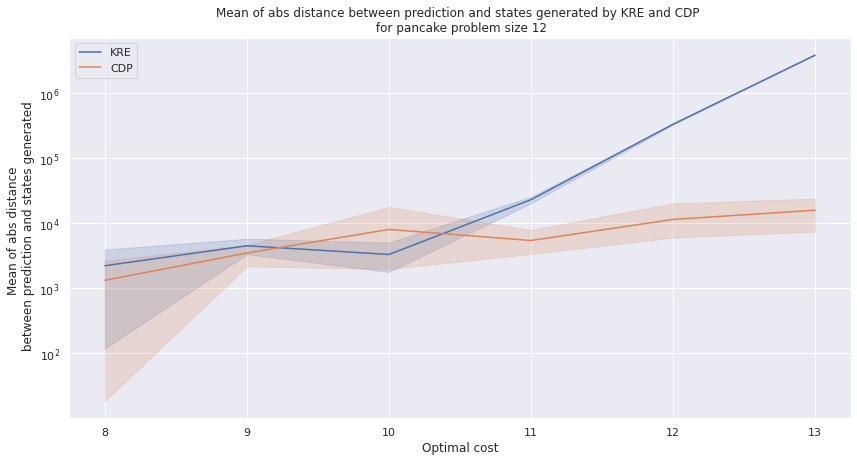

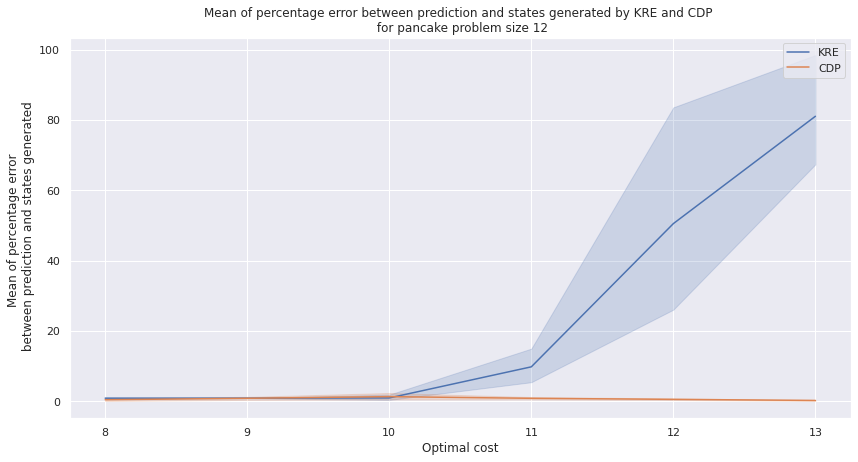

In [78]:
df_res_acum= df_res.groupby("cost").mean()
# line plot of mean of dist_kre and dist_cdp by optimal_costusing seaborn ploy log(y)
import seaborn as sns
import matplotlib.pyplot as plt
def plot_graphs(df):
    n=df.problem_size[0]
    sns.set_theme(style="darkgrid")
    sns.lineplot(data=df_res, x="optimal_cost", y="dist_kre",label="KRE")
    sns.lineplot(data=df_res, x="optimal_cost", y="dist_cdp",label="CDP")
    plt.yscale('log')
    #y axis label
    plt.ylabel('Mean of abs distance \n between prediction and states generated')
    #x axis label
    plt.xlabel('Optimal cost')
    plt.title(f'Mean of abs distance between prediction and states generated by KRE and CDP \n for pancake problem size {n}')
    #  make plot bigger 
    plt.rcParams["figure.figsize"] = (14,7)
    plt.savefig(f'plots/pancake_abs_distance_{n}.png')
    plt.show()
    
    sns.lineplot(data=df_res, x="optimal_cost", y="per_err_kre",label="KRE")
    sns.lineplot(data=df_res, x="optimal_cost", y="per_err_cdp",label="CDP")

    #y axis label
    plt.ylabel('Mean of percentage error \n between prediction and states generated')
    #x axis label
    plt.xlabel('Optimal cost')
    plt.title(f'Mean of percentage error between prediction and states generated by KRE and CDP \n for pancake problem size {n}')
    #  make plot bigger
    plt.rcParams["figure.figsize"] = (14,7)
    plt.savefig(f'plots/pancake_percentage_error_{n}.png')
    plt.show()


plot_graphs(df_res)

In [87]:
df_res_acum= df_res.groupby("h_state").mean()
df_res_acum.reset_index(inplace=True)
df_res_acum=df_res_acum.sort_values(by=['h_state'])
# dont display with e
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# df_res_acum[["h_state","states generated","pred_KRE","pred_CDP"]]
df_res_acum[["h_state","optimal_cost"]]

,h_state,optimal_cost
0,6,8.000
1,7,9.143
2,8,9.750
3,9,10.760
4,10,11.541
5,11,12.250


In [35]:
df_res_acum

,problem_size,bound,optimal_cost,states generated,pred_KRE,pred_CDP,dist_kre,dist_cdp,per_err_kre,per_err_cdp
cost,,,,,,,,,,
8,12.0,0.0,8.0,2254.000000,2.418271e+01,3571.764711,2.229817e+03,1330.119468,0.938549,0.489184
9,12.0,0.0,9.0,4782.333333,2.665820e+02,8275.520431,4.515751e+03,3493.187097,0.938738,0.901770
10,12.0,0.0,10.0,5269.187500,2.933270e+03,11825.012023,3.317836e+03,8050.769063,1.000376,1.370509
11,12.0,0.0,11.0,10251.000000,3.226697e+04,10530.962465,2.309329e+04,5442.603034,9.839158,0.896558
12,12.0,0.0,12.0,21145.108108,3.549377e+05,20703.403246,3.337925e+05,11479.103036,50.533908,0.599760
13,12.0,0.0,13.0,49761.400000,3.904314e+06,33973.947034,3.854553e+06,15902.231779,81.030829,0.289604


In [36]:
#read csv 
lst_size= [10,12,14]
df_res_total=pd.DataFrame()
for n_size in lst_size:
    df_res = pd.read_csv(f'res_cdp_{n_size}.csv')
    #order by the optimal_cost
    df_res = df_res.sort_values(by=['optimal_cost'])
    df_res["dist_cdp"]=abs(df_res["states generated"]-df_res["pred_CDP"])

    # precnrage error 
    df_res["per_err_cdp"]=df_res["dist_cdp"]/df_res["states generated"]
    
    df_res=df_res.groupby("cost").mean().reset_index()
    df_res_total=df_res_total.append(df_res)


In [37]:
df_res_total

,cost,problem_size,bound,optimal_cost,states generated,pred_KRE,pred_CDP,dist_cdp,per_err_cdp
0,7,10.0,0.0,7.0,277.800000,5.240757e+01,242.967695,112.343373,0.576227
1,8,10.0,0.0,8.0,1175.125000,4.725353e+02,2948.725023,1830.615121,1.879668
2,9,10.0,0.0,9.0,2727.146341,4.253818e+03,5667.139496,3407.077216,1.268438
3,10,10.0,0.0,10.0,4935.176471,3.828536e+04,8966.094926,5631.960599,1.160825
4,11,10.0,0.0,11.0,13737.666667,3.445683e+05,14427.732142,2335.755953,0.204255
0,8,12.0,0.0,8.0,2254.000000,2.418271e+01,3571.764711,1330.119468,0.489184
1,9,12.0,0.0,9.0,4782.333333,2.665820e+02,8275.520431,3493.187097,0.901770
2,10,12.0,0.0,10.0,5269.187500,2.933270e+03,11825.012023,8050.769063,1.370509
3,11,12.0,0.0,11.0,10251.000000,3.226697e+04,10530.962465,5442.603034,0.896558
4,12,12.0,0.0,12.0,21145.108108,3.549377e+05,20703.403246,11479.103036,0.599760


In [47]:
# for each optimal_cost check if there are 3 different problem size if not remove the row
df_res_total=df_res_total.groupby("optimal_cost").filter(lambda x: len(x) >= 2)
df_res_total

,cost,problem_size,bound,optimal_cost,states generated,pred_KRE,pred_CDP,dist_cdp,per_err_cdp
1,8,10.0,0.0,8.0,1175.125000,4.725353e+02,2948.725023,1830.615121,1.879668
2,9,10.0,0.0,9.0,2727.146341,4.253818e+03,5667.139496,3407.077216,1.268438
3,10,10.0,0.0,10.0,4935.176471,3.828536e+04,8966.094926,5631.960599,1.160825
4,11,10.0,0.0,11.0,13737.666667,3.445683e+05,14427.732142,2335.755953,0.204255
0,8,12.0,0.0,8.0,2254.000000,2.418271e+01,3571.764711,1330.119468,0.489184
1,9,12.0,0.0,9.0,4782.333333,2.665820e+02,8275.520431,3493.187097,0.901770
2,10,12.0,0.0,10.0,5269.187500,2.933270e+03,11825.012023,8050.769063,1.370509
3,11,12.0,0.0,11.0,10251.000000,3.226697e+04,10530.962465,5442.603034,0.896558
4,12,12.0,0.0,12.0,21145.108108,3.549377e+05,20703.403246,11479.103036,0.599760
5,13,12.0,0.0,13.0,49761.400000,3.904314e+06,33973.947034,15902.231779,0.289604


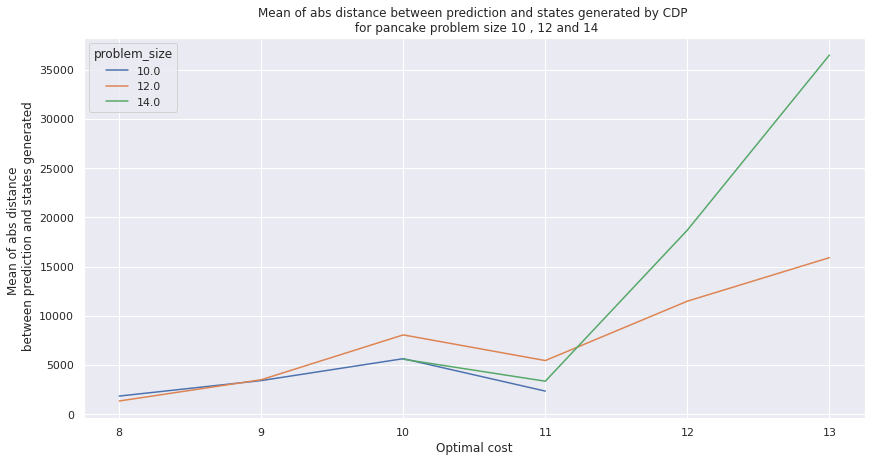

In [52]:
# all the rows that have multiple problem_size fpr  optimal cost
# line plot of mean of  dist_cdp, x=optimal_cost, y=dist_cdp, hue=problem_size
import seaborn as sns
import matplotlib.pyplot as plt
def plot_graphs(df):
    df=df.melt(id_vars=['optimal_cost',"problem_size"], value_vars=['dist_cdp',])

    sns.lineplot(data=df, x="optimal_cost", y="value",hue="problem_size",palette="deep")

    #log scale
    
    #y axis label
    plt.ylabel('Mean of abs distance \n between prediction and states generated')
    #x axis label
    plt.xlabel('Optimal cost')
    plt.title(f'Mean of abs distance between prediction and states generated by CDP \n for pancake problem size 10 , 12 and 14')
    #  make plot bigger 
    plt.rcParams["figure.figsize"] = (14,7)
    plt.savefig(f'plots/pancake_abs_distance_10_12_14.png')
    plt.show()
plot_graphs(df_res_total)

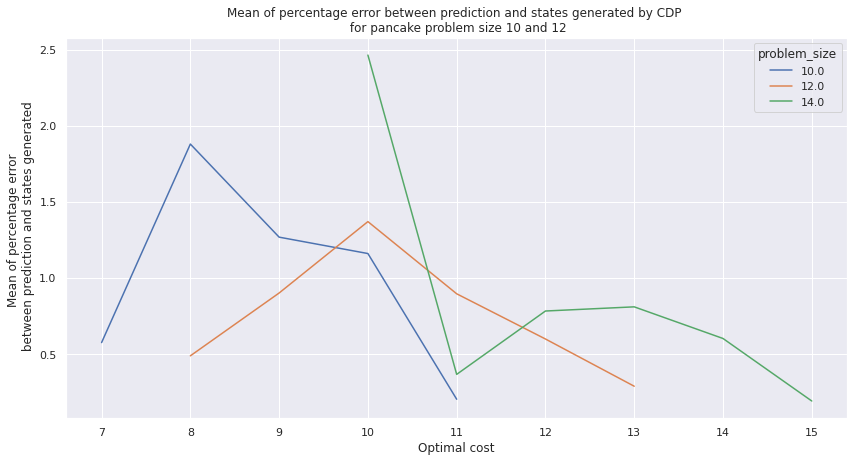

In [40]:
#same plot but with percentage error
sns.set_palette("deep")

def plot_graphs(df):
    #defult color palette
    # sns.set_palette("muted")
    df=df.melt(id_vars=['optimal_cost',"problem_size"], value_vars=['per_err_cdp',])

    sns.lineplot(data=df, x="optimal_cost", y="value",hue="problem_size",palette="deep")

    #log scale
    
    #y axis label
    plt.ylabel('Mean of percentage error \n between prediction and states generated')
    #x axis label
    plt.xlabel('Optimal cost')
    plt.title(f'Mean of percentage error between prediction and states generated by CDP \n for pancake problem size 10 and 12')
    #  make plot bigger 
    plt.rcParams["figure.figsize"] = (14,7)
    plt.savefig(f'plots/pancake_percentage_error_10_12_14.png')
    plt.show()
plot_graphs(df_res_total)